In [ ]:
import yfinance as yf

data = yf.download("AAPL", start="2018-01-01", end="2024-12-01")
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2018-01-02  40.524353  43.064999  43.075001  42.314999  42.540001  102223600
2018-01-03  40.517292  43.057499  43.637501  42.990002  43.132500  118071600
2018-01-04  40.705494  43.257500  43.367500  43.020000  43.134998   89738400
2018-01-05  41.168938  43.750000  43.842499  43.262501  43.360001   94640000
2018-01-08  41.016022  43.587502  43.902500  43.482498  43.587502   82271200


In [ ]:
import numpy as np

price = np.array(data['Close'])
print(price)

[[ 43.06499863]
 [ 43.05749893]
 [ 43.25749969]
 ...
 [235.05999756]
 [234.92999268]
 [237.33000183]]


In [ ]:
print(price.shape)

(1740, 1)


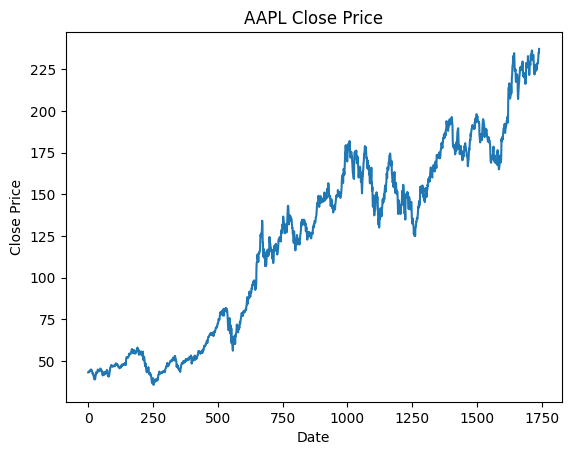

In [ ]:
import matplotlib.pyplot as plt

plt.plot(price)
plt.title('AAPL Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(price)

def split_sequences(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

n_steps = 15
X, Y = split_sequences(train_data, n_steps)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1380, 15, 1) (345, 15, 1) (1380, 1) (345, 1)


In [ ]:
from keras import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics = ['mean_squared_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.hist = model.fit(X_train, Y_train, epochs=200, verbose=1, batch_size=32, validation_split=0.1)

Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.1387 - mean_squared_error: 0.1387 - val_loss: 4.8199e-04 - val_mean_squared_error: 4.8199e-04
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 9.0451e-04 - val_mean_squared_error: 9.0451e-04
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5806e-04 - mean_squared_error: 8.5806e-04 - val_loss: 6.8987e-04 - val_mean_squared_error: 6.8987e-04
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9960e-04 - mean_squared_error: 5.9960e-04 - val_loss: 4.0230e-04 - val_mean_squared_error: 4.0230e-04
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4673e-04 - mean_squared_error: 4.4673e-04 - val_loss: 3.2387e-04 - val_mean_squared_error: 3.2387e-04
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2082e-04 - mean_squared_error: 4.2082e-04 - val_loss: 3.0819e-04 - val_mean_squared_error: 3.0819e-04
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━

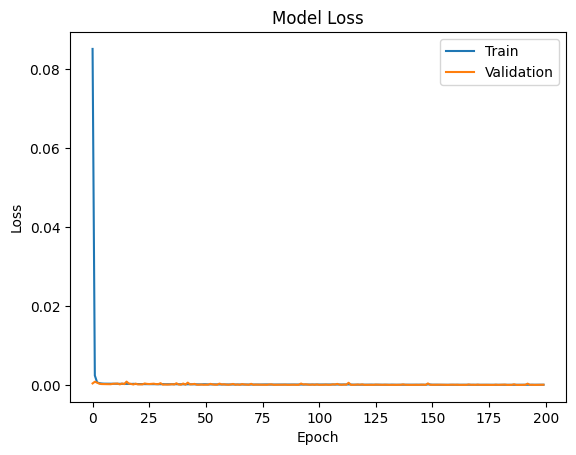

In [ ]:
plt.plot(model.hist.history['loss'])
plt.plot(model.hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [ ]:
import numpy as np

# Predict the values for the test data
yhat = model.predict(X_test, verbose=1)

# Inverse transform the predictions to get the original scale
yhat = scaler.inverse_transform(yhat)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


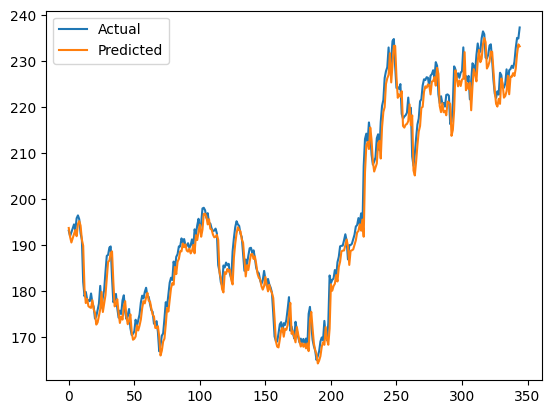

In [ ]:
plt.plot(scaler.inverse_transform(Y_test), label='Actual')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(scaler.inverse_transform(Y_test), yhat)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 9.717999554177123
RMSE: 3.1173706154670033


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Price prediction for the next trading day : [[236.00938]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


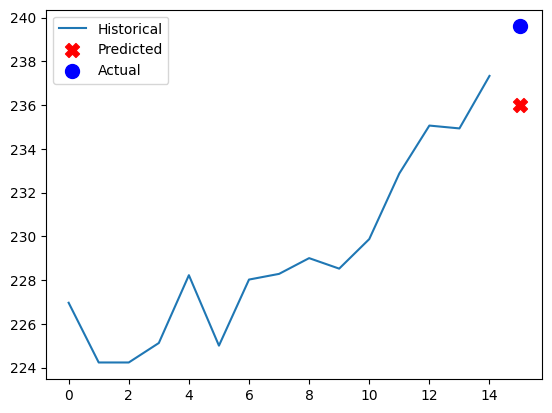

In [ ]:
last_15_day_prices = np.array(train_data[len(train_data)-15: len(price)])

last_15_day_prices = last_15_day_prices.reshape(1, 15, 1)

print('Price prediction for the next trading day :', scaler.inverse_transform(model.predict(last_15_day_prices)))

plt.plot(scaler.inverse_transform(last_15_day_prices[0]), label='Historical')
plt.scatter(len(scaler.inverse_transform(last_15_day_prices[0])), scaler.inverse_transform(model.predict(last_15_day_prices)), label='Predicted', marker='X', s=100, color='red')
plt.scatter(len(scaler.inverse_transform(last_15_day_prices[0])), 239.59, label='Actual', marker='o', s=100, color='blue')
plt.legend()
plt.show()